training Error:  [0.8964899069746324, 0.8549261013012451, 0.8288023471091887, 0.8073514558154427, 0.7680109925081646, 0.5397418617727904, 0.5447077404119407, 0.8295997120355592]
test error:  [0.8956820906279199, 0.8536925595828437, 0.8276509571079061, 0.8063362901697904, 0.7626083579348162, 0.5517996685488789, 0.5871894360667894, 0.8482355339925517]
best learning rate:  0.005
training Error:  [0.7778563760582747, 0.5974053329354907, 0.5705155288326658, 0.5503117432119109, 0.5397418617727904, 0.5336581418016813, 0.5330795647870589, 0.5336479284090737, 0.5341972877621046, 0.534354620979675]
test error:  [0.7662912856217876, 0.5908762599141016, 0.5722182249762687, 0.5573016586677181, 0.5517996685488789, 0.5577581729259299, 0.5641394329008297, 0.5689209823700243, 0.5721310707122081, 0.5735297980790065]
50
training Error:  [0.7778889737794711, 0.5974543392454775, 0.570594407199783, 0.5504603742011936, 0.5399023074210416, 0.5337901417239912, 0.5331128498261624, 0.5336974879267512, 0.53414956

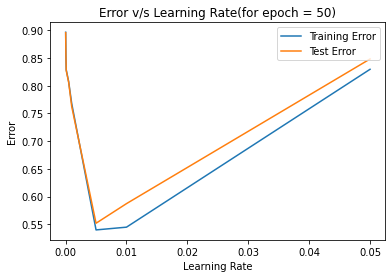

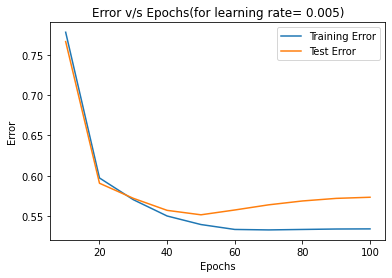

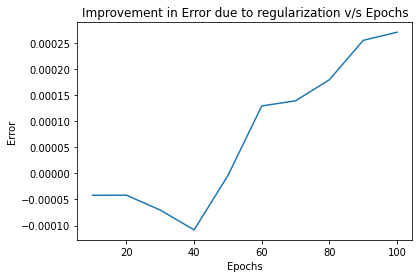

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt

# create weight array
def getArray(rows,cols,num):
  return [[num]*cols]*rows

#initializing network parameter having hard-coded architecture
n_input = 4
n_hidden1 = 5
n_hidden2 = 4
n_output = 3
weights = []
output = []
onehotvector = np.array([[1,0,0],[0,1,0],[0,0,1]])
error = []

def getWeights():
  weights = []
  weights.append(np.empty([n_hidden1,n_input+1]))
  weights.append(np.empty([n_hidden2,n_hidden1+1]))
  weights.append(np.empty([n_output,n_hidden2+1]))
  num= 1e-2
  for i in range(n_hidden1):
    for j in range(n_input+1):
      weights[0][i][j] = num
      num = num + 1e-3

  for i in range(n_hidden2):
    for j in range(n_hidden1+1):
      weights[1][i][j] = num
      num = num + 1e-3

  for i in range(n_output):
    for j in range(n_hidden2+1):
      weights[2][i][j] = num
      num = num + 1e-3

  return weights

def getOutputVector():
  output = []
  output.append(np.zeros(n_input))
  output.append(np.zeros(n_hidden1))
  output.append(np.zeros(n_hidden2))
  output.append(np.zeros(n_output))
  return output

def getErrorVector():
  error = []
  error.append(np.zeros(n_hidden1))
  error.append(np.zeros(n_hidden2))
  error.append(np.zeros(n_output))
  return error


def forwardPass(input):
  for i in range(n_input):
    output[0][i] = input[i]

  for i in range(n_hidden1):
    y = 0
    for j in range(n_input):
      y = y + output[0][j]*weights[0][i][j]
    y = y + 1*weights[0][i][n_input]
    if y>0:
      output[1][i] = y
    else:
      output[1][i] = 0

  for i in range(n_hidden2):
    y = 0
    for j in range(n_hidden1):
      y = y + output[1][j]*weights[1][i][j]
    y = y + 1*weights[1][i][n_hidden1]
    if y>0:
      output[2][i] = y
    else:
      output[2][i] = 0

  for i in range(n_output):
    y = 0
    for j in range(n_hidden2):
      y = y + output[2][j]*weights[2][i][j]
    y = y + 1*weights[2][i][n_hidden2]
    if y>0:
      output[3][i] = y
    else:
      output[3][i] = 0
  
  #print("output: ",output)
  

def backpropagation(target):
  for i in range(n_output):
    error[2][i] = onehotvector[target][i] - output[3][i]

  for i in range(n_hidden2):
    error[1][i] = 0
    for j in range(n_output):
      error[1][i] = error[1][i] + error[2][j]*weights[2][j][i]

  for i in range(n_hidden1):
    error[0][i] = 0
    for j in range(n_hidden2):
      error[0][i] = error[0][i] + error[1][j]*weights[1][j][i]

  #print("error")
  #print(error[2])

  rms = 0
  for i in range(n_output):
    rms = rms+error[2][i]*error[2][i]
  return rms

def updateWeights(learning_rate,regularizer):
  for i in range(n_hidden1):
    for j in range(n_input):
      weights[0][i][j] = weights[0][i][j] + learning_rate*(error[0][i]*output[0][j] - regularizer*weights[0][i][j])
    weights[0][i][n_input] = weights[0][i][n_input] + learning_rate*(error[0][i]*1 - regularizer*weights[0][i][n_input])

  for i in range(n_hidden2):
    for j in range(n_hidden1):
      weights[1][i][j] = weights[1][i][j] + learning_rate*(error[1][i]*output[1][j] - regularizer*weights[1][i][j])
    weights[1][i][n_hidden1] = weights[1][i][n_hidden1] + learning_rate*(error[1][i]*1 - regularizer*weights[1][i][n_hidden1])

  for i in range(n_output):
    for j in range(n_hidden2):
      weights[2][i][j] = weights[2][i][j] + learning_rate*(error[2][i]*output[2][j] - regularizer*weights[2][i][j])
    weights[2][i][n_hidden2] = weights[2][i][n_hidden2] + learning_rate*(error[2][i]*1 - regularizer*weights[2][i][n_hidden2])

  #print("weights")
  #print(weights[0])
  #print(weights[1])
  #print(weights[2])

#loading iris dataset
iris = datasets.load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.10)
n_features = x_train.shape[1]
n_test = x_test.shape[0]
n_train = x_train.shape[0]

#initializing the network parameters
n_test = y_test.shape[0]
n_train = y_train.shape[0]
epochs = 50
learning_rates = [1e-5,5e-5,1e-4,5e-4,1e-3,5e-3,1e-2,5e-2]
training_error = []
test_error = []

#training the network
for n in learning_rates:
  #initialization
  weights = getWeights()
  output = getOutputVector()
  error = getErrorVector()
  err = 0
  #training
  for e in range(epochs):
    err = 0
    for i in range(n_train):
      forwardPass(x_train[i])
      err = err + backpropagation(y_train[i])
      updateWeights(n,0)
  training_error.append(math.sqrt(err/n_train))
  #testing
  err = 0
  for i in range(n_test):
    forwardPass(x_test[i])
    #print(y_test[i]," : predict: ",np.argmax(output[3]))
    err_vec = onehotvector[y_test[i]] - output[3]
    for h in range(3):
      err = err+ err_vec[h]*err_vec[h]
  err = math.sqrt(err/n_test)
  test_error.append(err)
    #print("output: ",output[3])
    #print("target: ",onehotvector[y_test[i]])

print("training Error: ",training_error)
print("test error: ",test_error)
best_rate = learning_rates[np.argmin(np.array(test_error))]
print("best learning rate: ",best_rate)

#second part of the question
epoch_set = [10,20,30,40,50,60,70,80,90,100]
training_error1 = []
test_error1 = []
for epochs in epoch_set:
  #initialization
  weights = getWeights()
  output = getOutputVector()
  error = getErrorVector()
  err = 0
  #training 
  for e in range(epochs):
    err = 0
    for i in range(n_train):
      forwardPass(x_train[i])
      err = err + backpropagation(y_train[i])
      updateWeights(best_rate,0)
  training_error1.append(math.sqrt(err/n_train))

  #testing
  err = 0
  for i in range(n_test):
    forwardPass(x_test[i])
    err_vec = onehotvector[y_test[i]] - output[3]
    for h in range(3):
      err = err+ err_vec[h]*err_vec[h]
  err = math.sqrt(err/n_test)
  test_error1.append(err)

print("training Error: ",training_error1)
print("test error: ",test_error1)
best_epoch = epoch_set[np.argmin(np.array(test_error1))]
print(best_epoch)

#third part of the question
epoch_set = [10,20,30,40,50,60,70,80,90,100]
training_error2 = []
test_error2 = []
for epochs in epoch_set:
  #initialization
  weights = getWeights()
  output = getOutputVector()
  error = getErrorVector()
  err = 0
  #training 
  for e in range(epochs):
    err = 0
    for i in range(n_train):
      forwardPass(x_train[i])
      err = err + backpropagation(y_train[i])
      updateWeights(best_rate,1e-4)
  training_error2.append(math.sqrt(err/n_train))

  #testing
  err = 0
  for i in range(n_test):
    forwardPass(x_test[i])
    err_vec = onehotvector[y_test[i]] - output[3]
    for h in range(3):
      err = err+ err_vec[h]*err_vec[h]
  err = math.sqrt(err/n_test)
  test_error2.append(err)

print("training Error: ",training_error2)
print("test error: ",test_error2)
plot_error = []
for i in range(len(test_error2)):
  plot_error.append(test_error1[i]-test_error2[i])

#plotting the results
#part1
plt.plot(learning_rates, training_error,label='Training Error')
plt.plot(learning_rates, test_error,label='Test Error')
plt.xlabel('Learning Rate')
plt.ylabel('Error')
plt.title("Error v/s Learning Rate(for epoch = 50)")
legend = []
legend.append("Training Error")
legend.append("Test Error")
plt.legend(legend, loc='upper right')
plt.show()

#part2
plt.plot(epoch_set, training_error1,label='Training Error')
plt.plot(epoch_set, test_error1,label='Test Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title("Error v/s Epochs(for learning rate= "+str(best_rate)+")")
legend = []
legend.append("Training Error")
legend.append("Test Error")
plt.legend(legend, loc='upper right')
plt.show()

#part3
plt.plot(epoch_set, plot_error,label='Improvement in Error due to regularization')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title("Improvement in Error due to regularization v/s Epochs")
plt.show()


